In [80]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import json
from functools import reduce
%matplotlib inline

In [105]:
greedy = pd.read_json(os.path.join('..','results','result_greedy.json')).T

In [82]:
greedy

,Crescente,Decrescente,Eficiente
input1.in,14578,22911,29636
input2.in,19957,9893,64939
input3.in,38379,19893,143449
input4.in,21347,23630,28840
input5.in,5335,10844,15785
input6.in,6,63881,99861
input7.in,505,1148,1894
input8.in,714,510,714
input9.in,9717,9994,9717
input10.in,17523,19994,17523


In [106]:
def get_values(grasp, key):
    all_values = []
    for instancia in instancias:
        all_values.append(list(grasp[instancia][key].values()))
    temp = []
    for list_value in all_values:
        temp += list_value
    return temp

In [107]:
with open(os.path.join('..','results','result_GRASP.json')) as file:
    grasp = json.loads(file.read())

In [108]:
instancias = ['input1.in','input2.in', 'input3.in', 'input4.in', 'input5.in', 'input6.in', 'input7.in', 'input8.in', 'input9.in', 'input10.in', 'input11.in', 'input12.in', 'input13.in', 'input14.in', 'input15.in', 'input16.in']
janelas = ['Janela - 2','Janela - 3','Janela - 4','Janela - 5','Janela - 6','Janela - 7','Janela - 8','Janela - 9']
col = ['Máx Iterações - 10', 'Máx Iterações - 100', 'Máx Iterações - 1000', 'Máx Iterações - 10000']

In [109]:
idx = pd.MultiIndex.from_product([instancias,janelas],names=['Instâncias', 'Janelas'])
df = pd.DataFrame(data='-', index=idx, columns=col)

In [110]:
df['Máx Iterações - 10'] = get_values(grasp,'Máx Iterações - 10')
df['Máx Iterações - 100'] = get_values(grasp,'Máx Iterações - 100')
df['Máx Iterações - 1000'] = get_values(grasp,'Máx Iterações - 1000')
df['Máx Iterações - 10000'] = get_values(grasp,'Máx Iterações - 10000')

In [111]:
grasp = df

In [ ]:
grasp

In [113]:
exact = pd.read_json(os.path.join('..','results','result_exact.json')).T

In [114]:
exact

,Exato
input1.in,31621
input2.in,67829
input3.in,143449
input4.in,28840
input5.in,15785
input6.in,99861
input7.in,1940
input8.in,741
input9.in,10281
input10.in,20149


# **Cálculo do GAP**

In [115]:
gap_grasp = grasp.copy()

In [116]:
index_exact = 0
for i in range(len(gap_grasp)):
    if i!=0 and i%8 == 0:
        index_exact = index_exact + 1
    gap_grasp.iloc[i] = ((exact.loc[exact.index[index_exact]].values[0]-gap_grasp.iloc[i])/exact.loc[exact.index[index_exact]].values[0])*100

Text(0, 0.5, 'GAP')

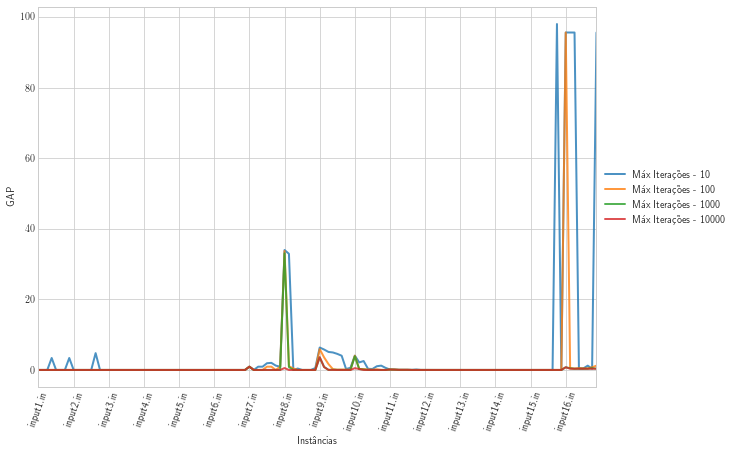

In [117]:
gap_grasp.plot(lw=2, alpha=0.8)
plt.xticks(np.arange(0,128,8), instancias.copy(), rotation=70)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('GAP')

In [124]:
grasp = grasp[['Máx Iterações - 10000']]

In [137]:
grasp.iloc[0].values

array([31621])

In [ ]:
# index = 0
# max_value = 0
# for i in range(len(gap_grasp)):
#     if i!=0 and i%8 == 0:
#         index = index + 1
#     if index == 0:
#         print(max(grasp.iloc[index].values))

In [171]:
np.where(grasp.loc['input16.in'].values == grasp.loc['input16.in'].values.max())

(array([5, 6, 7]), array([0, 0, 0]))

In [199]:
all_windows_ocurr = []
for inst in instancias:
    ocurr = np.where(grasp.loc[inst].values == grasp.loc[inst].values.max())[0]
    all_windows_ocurr += list(ocurr)

In [215]:
best_window = 0
for i in range(len(janelas)):
    if all_windows_ocurr.count(i) > best_window:
        best_window = all_windows_ocurr.count(i)
        best_arange = [i,best_window]

In [217]:
best_arange #index 5 = janela 7

[5, 16]

In [119]:
gap = pd.DataFrame(list(map(lambda x,y: ((y-x)/y)*100, greedy.values, exact.values)), columns=greedy.columns, index=greedy.index)

In [120]:
gap

,Crescente,Decrescente,Eficiente
input1.in,53.897726,27.544986,6.277474
input2.in,70.577482,85.414793,4.260714
input3.in,73.245544,86.132354,0.000000
input4.in,25.981276,18.065187,0.000000
input5.in,66.202091,31.301869,0.000000
input6.in,99.993992,36.030082,0.000000
input7.in,73.969072,40.824742,2.371134
input8.in,3.643725,31.174089,3.643725
input9.in,5.485848,2.791557,5.485848
input10.in,13.032905,0.769269,13.032905


In [121]:
gap.mean()

Crescente      49.594312
Decrescente    27.347272
Eficiente       2.213083
dtype: float64

In [122]:
gap.std()

Crescente      39.701770
Decrescente    31.341851
Eficiente       3.634122
dtype: float64

## **Estilos**

https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html

In [91]:
plt.rcParams['figure.figsize'] = (10, 7) #(width,height)
plt.rcParams['axes.grid'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['savefig.transparent'] = True

In [400]:
# plt.style.use('seaborn')
# plt.style.use('bmh')
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')

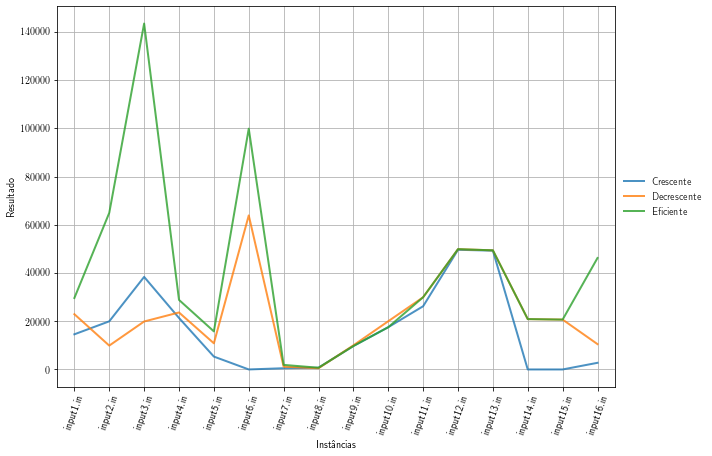

In [92]:
greedy.plot(lw=2, alpha=0.8, ls="-")
plt.style.use('seaborn-whitegrid')
plt.xticks(np.arange(len(greedy.index)), list(greedy.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(greedy.index)-0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultado')
plt.savefig(os.path.join('..','imgs/')+'greedy_compare.pdf', bbox_inches='tight', transparent=True)

# **GRASP**

Text(0, 0.5, 'Resultado')

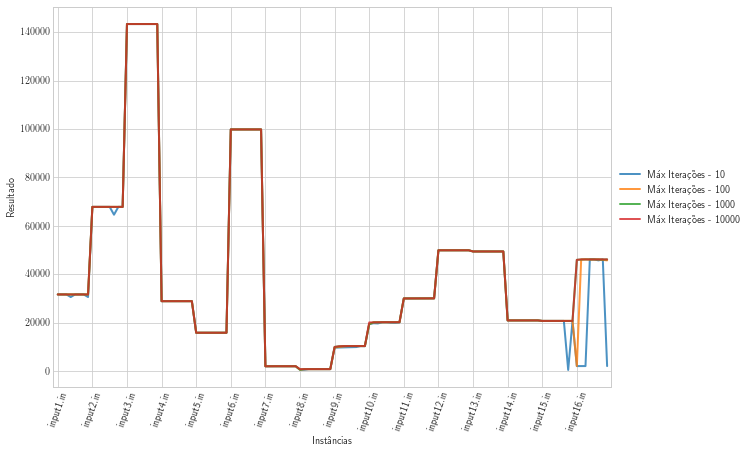

In [97]:
grasp.plot(lw=2, alpha=0.8)
plt.xticks(np.arange(0,128,8), instancias.copy(), rotation=70)
plt.axis(xmin=-1, xmax=len(grasp.index))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultado')

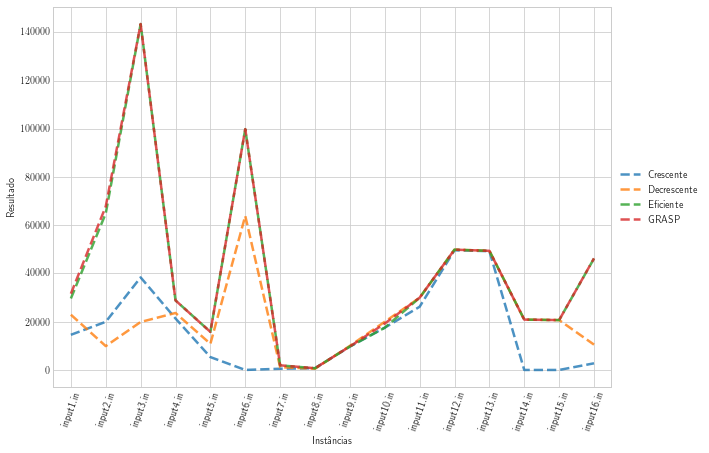

In [11]:
# results[["Crescente", "Decrescente", "Eficiente", "GRASP"]].plot(lw=2.5, alpha=0.8, ls="--", marker="")
# plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
# plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.xlabel('Instâncias')
# plt.ylabel('Resultado')
# plt.savefig(os.path.join('..','imgs/')+'heuristics_compare.pdf', bbox_inches='tight', transparent=True)

In [12]:
print(results[["Crescente", "Decrescente", "Eficiente", "GRASP"]].to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Crescente &  Decrescente &  Eficiente &   GRASP \\
\midrule
input1.in  &      14578 &        22911 &      29636 &   31621 \\
input2.in  &      19957 &         9893 &      64939 &   67829 \\
input3.in  &      38379 &        19893 &     143449 &  143449 \\
input4.in  &      21347 &        23630 &      28840 &   28840 \\
input5.in  &       5335 &        10844 &      15785 &   15785 \\
input6.in  &          6 &        63881 &      99861 &   99861 \\
input7.in  &        505 &         1148 &       1894 &    1922 \\
input8.in  &        714 &          510 &        714 &     720 \\
input9.in  &       9717 &         9994 &       9717 &    9755 \\
input10.in &      17523 &        19994 &      17523 &   19246 \\
input11.in &      26212 &        29943 &      29943 &   29965 \\
input12.in &      49622 &        49884 &      49884 &   49885 \\
input13.in &      49262 &        49395 &      49395 &   49395 \\
input14.in &          0 &        20880 &      20880 &   2

## **Adicionando os resultados exatos**

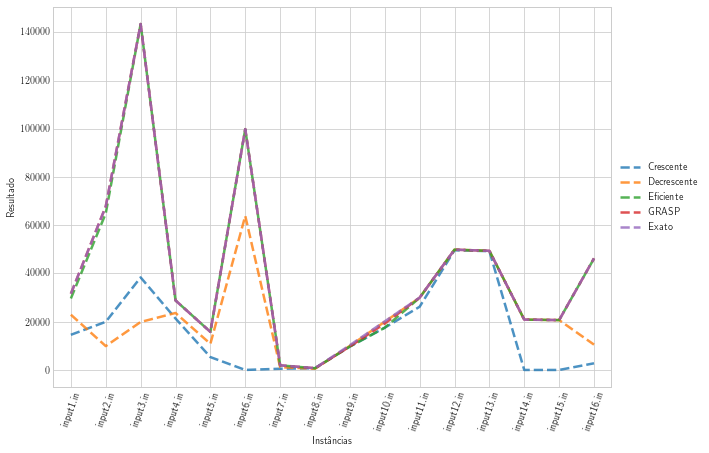

In [13]:
results[["Crescente", "Decrescente", "Eficiente", "GRASP", "Exato"]].plot(lw=2.5, alpha=0.8, ls="--")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Resultado')
plt.savefig(os.path.join('..','imgs/')+'exact_compare.pdf', bbox_inches='tight', transparent=True)

# **TEMPO DE EXECUÇÃO**

In [23]:
time = pd.read_json(os.path.join('..','results','time.json')).T

In [24]:
time = time[['Crescente','Decrescente','Eficiente','GRASP','Exato']]

In [25]:
print(time.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  Crescente &  Decrescente &  Eficiente &        GRASP &        Exato \\
\midrule
input1.in  &   0.000012 &     0.000008 &   0.000049 &     0.012054 &     0.299604 \\
input2.in  &   0.000018 &     0.000014 &   0.000045 &     0.035831 &     0.831294 \\
input3.in  &   0.000025 &     0.000017 &   0.000059 &     0.304420 &     2.007281 \\
input4.in  &   0.000026 &     0.000018 &   0.000049 &     0.082717 &     2.014614 \\
input5.in  &   0.000045 &     0.000034 &   0.000087 &     1.203739 &     1.989233 \\
input6.in  &   0.000077 &     0.000069 &   0.000148 &     5.439759 &    26.858557 \\
input7.in  &   0.000118 &     0.000106 &   0.000224 &     1.355621 &     0.598913 \\
input8.in  &   0.000154 &     0.000142 &   0.000289 &     3.156068 &     0.785180 \\
input9.in  &   0.000445 &     0.000385 &   0.000795 &     7.355839 &    10.908195 \\
input10.in &   0.000045 &     0.000034 &   0.000086 &     0.129530 &     4.878645 \\
input11.in &   0.000045 &     0

Text(0, 0.5, 'Tempo/s')

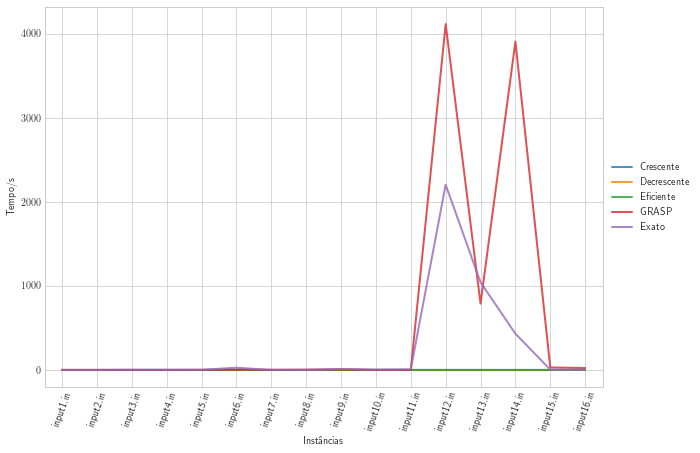

In [26]:
time.plot(lw=2, alpha=0.8, ls="-")
plt.xticks(np.arange(len(results.index)), list(results.index), rotation=70)
plt.axis(xmin=-.5, xmax=len(results.index)-0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Tempo/s')
# plt.savefig(os.path.join('..','imgs/')+'greedy_compare.pdf', bbox_inches='tight', transparent=True)

Text(0, 0.5, 'Tempo/s')

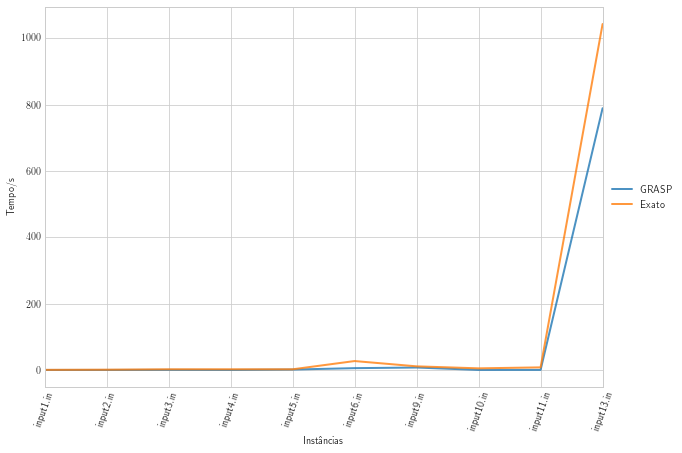

In [27]:
time[time["Exato"] > time["GRASP"]][["GRASP","Exato"]].plot(lw=2, alpha=0.8, ls="-")
plt.xticks(rotation=70)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Tempo/s')

Text(0, 0.5, 'Tempo/s')

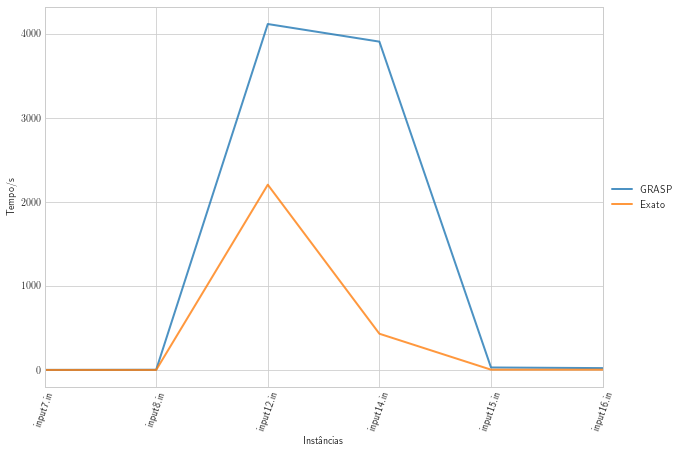

In [28]:
time[time["Exato"] < time["GRASP"]][["GRASP","Exato"]].plot(lw=2, alpha=0.8, ls="-")
plt.xticks(rotation=70)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Instâncias')
plt.ylabel('Tempo/s')

In [31]:
time.sum()/60

Crescente        0.000247
Decrescente      0.000227
Eficiente        0.000491
GRASP          148.036798
Exato           62.424592
dtype: float64

In [152]:
df = pd.DataFrame([['a', 'b'], ['c', 'd']],index=['row 1', 'row 2'],columns=['col 1', 'col 2'])

In [153]:
df

,col 1,col 2
row 1,a,b
row 2,c,d


In [155]:
df.to_json('test.json',orient='table')